In [5]:
# Setting up params
# Path to a video to process
video_path = "/home/petro/snu/resources/1.mp4"
# As it might be too many images we could not read them all to memory, so we will cache them to this folder
folder_with_frames = '/home/petro/snu/resources/frames/'

In [6]:
# Extract frames
import cv2
import os
import pandas as pd
video = cv2.VideoCapture(video_path)
fps = video.get(cv2.CAP_PROP_FPS)
frames_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frames_count / fps # that guy is not providing an exact duration
print(f'Duration {duration} seconds')
frame_width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
frame_height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
data = {
    'Frame_Path': [],
    'Timestamp': []
}
if not os.path.exists(folder_with_frames):
    os.mkdir(folder_with_frames)
timestamp = 0
step = round(duration * 100 / frames_count) / 100
print(f'Time step is {step} seconds')
for i in range(frames_count):
    success, image = video.read()
    timestamp = i * step
    img_path = os.path.join(folder_with_frames, f'frame_{i}.png')
    if not os.path.exists(img_path):
        cv2.imwrite(img_path, image)
    data['Frame_Path'].append(img_path)
    data['Timestamp'].append(pd.Timedelta(seconds=timestamp))
    
frames_df = pd.DataFrame(data)

Duration 2605.6 seconds
Time step is 0.2 seconds


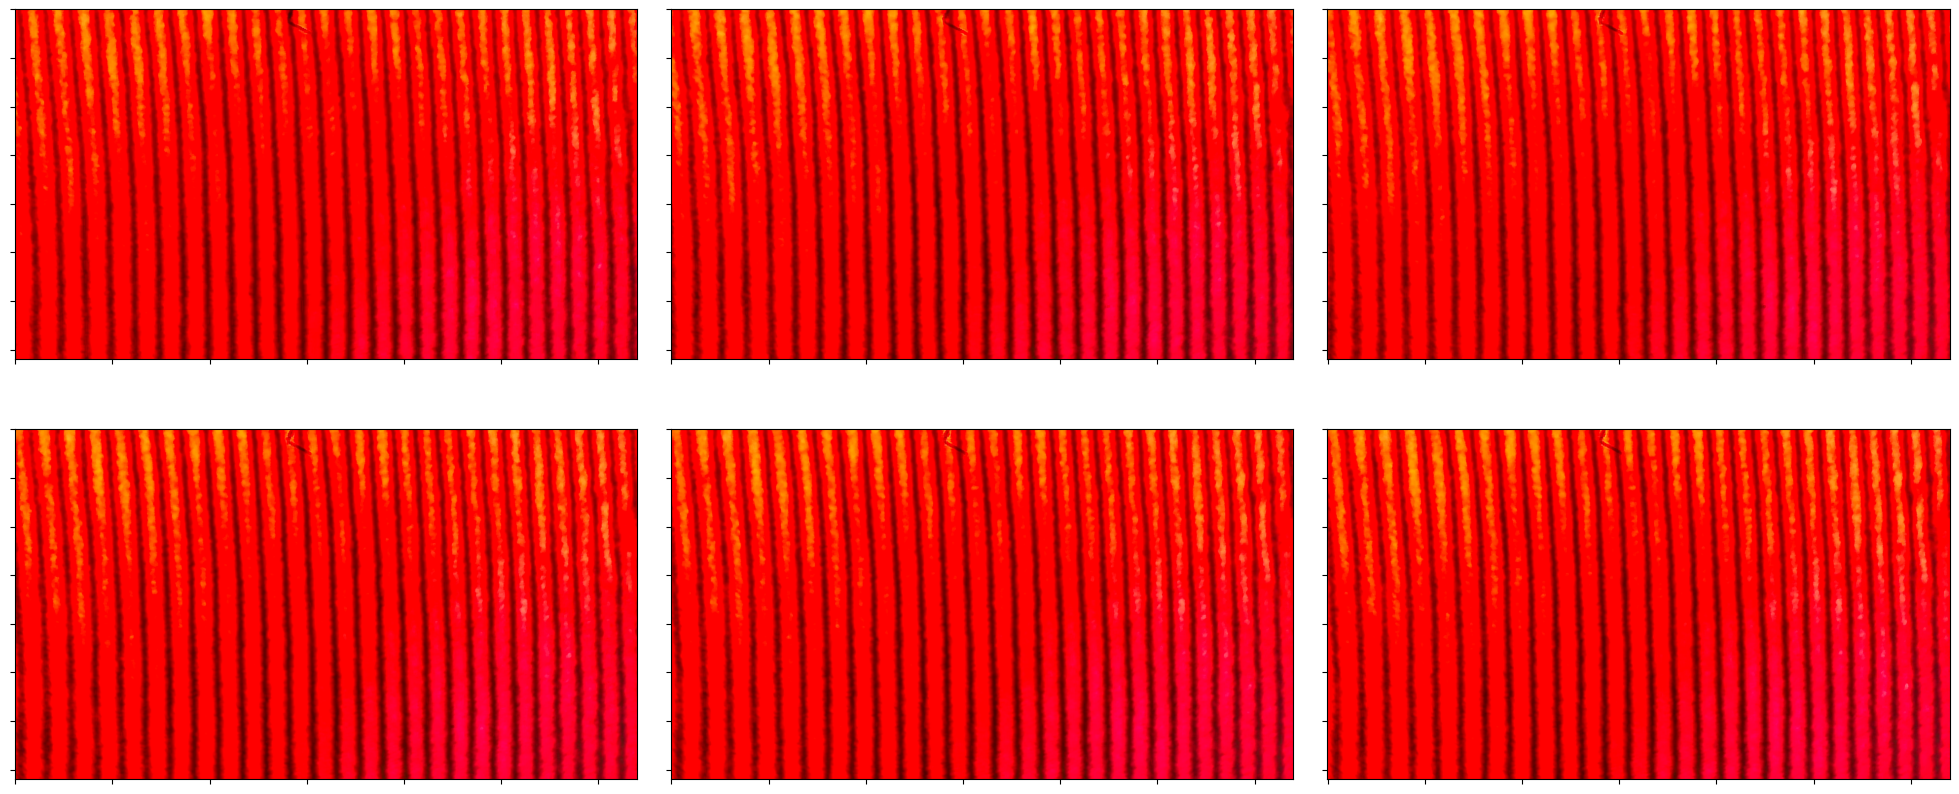

In [7]:
# Preview Frames
from matplotlib import pyplot as plt
row_count = 2
col_count = 3
step = frames_count // (row_count * col_count)
fig, axes = plt.subplots(row_count,col_count, figsize=[25, 10])
fig.subplots_adjust( hspace=0.2, wspace=0.05)
for i in range(frames_count):
    if i % step != 0:
        continue
    seq_index = i // step
    row_index = seq_index // col_count
    col_index = seq_index % col_count
    if row_index >= row_count:
        break
    image = cv2.imread(frames_df.loc[i, 'Frame_Path'])
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if i == 0:
        first_frame = rgb
    ax = axes[row_index, col_index]
    ax.imshow(rgb)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
plt.show()

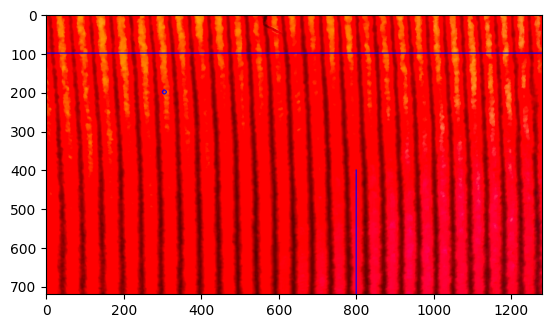

In [8]:
# Select pixel to analyze
pxl_x = 305
pxl_y = 200
first_frame = cv2.imread(frames_df.loc[0, 'Frame_Path'])
first_frame = cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB)
image = cv2.circle(first_frame, (pxl_x, pxl_y), 5, (0, 0, 255) , 2)
image = cv2.line(image, (0, 100), (1280, 100), (0, 0, 255) , 2)
image = cv2.line(image, (800, 400), (800, 720), (0, 0, 255) , 2)
plt.imshow(image)
plt.show()

In [9]:
# Extract signal strength at Selected Pixel over time
import numpy as np
def get_signal(frame_path):
    image = cv2.imread(frame_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray[pxl_y, pxl_x]
    
frames_df['Signal_Strength'] = frames_df['Frame_Path'].apply(get_signal)
frames_df

,Frame_Path,Timestamp,Signal_Strength
0,/home/petro/snu/resources/frames/frame_0.png,0 days 00:00:00,112
1,/home/petro/snu/resources/frames/frame_1.png,0 days 00:00:00.200000,117
2,/home/petro/snu/resources/frames/frame_2.png,0 days 00:00:00.400000,117
3,/home/petro/snu/resources/frames/frame_3.png,0 days 00:00:00.600000,116
4,/home/petro/snu/resources/frames/frame_4.png,0 days 00:00:00.800000,119
...,...,...,...
13023,/home/petro/snu/resources/frames/frame_13023.png,0 days 00:43:24.600000,138
13024,/home/petro/snu/resources/frames/frame_13024.png,0 days 00:43:24.800000,139
13025,/home/petro/snu/resources/frames/frame_13025.png,0 days 00:43:25,140
13026,/home/petro/snu/resources/frames/frame_13026.png,0 days 00:43:25.200000,139


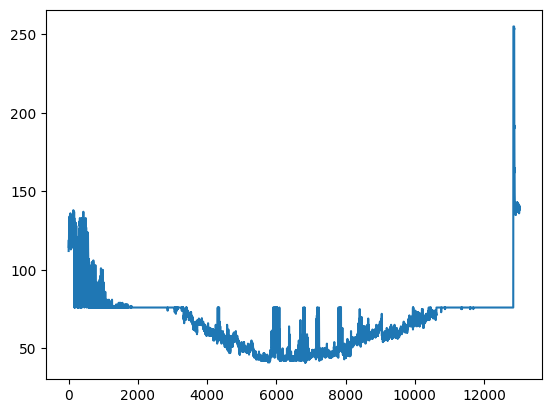

In [10]:
plt.plot(frames_df['Signal_Strength'])
plt.show()

In [11]:
fps

5.0

In [12]:
frames_count

13028

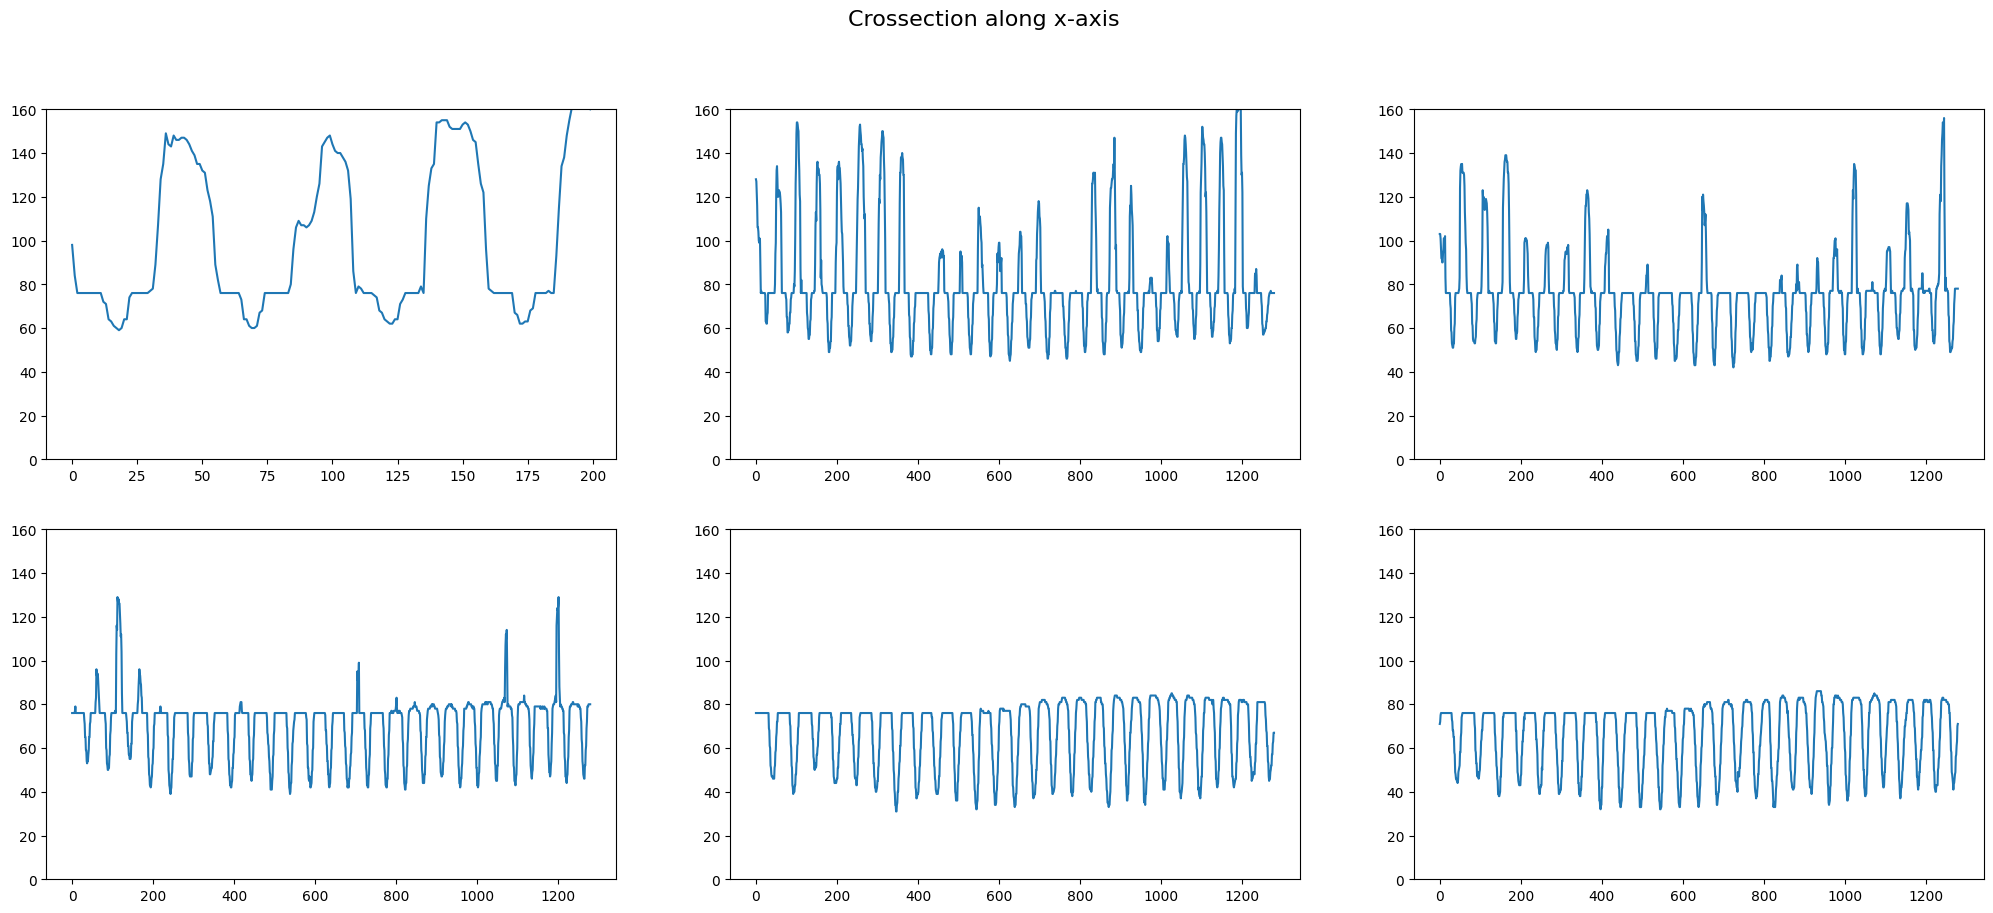

In [13]:
image = cv2.imread(frames_df.loc[100, 'Frame_Path'])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
slice_1 = gray[100, 0:200]
slice_2 = gray[200, :]
slice_3 = gray[300, :]
slice_4 = gray[400, :]
slice_5 = gray[700, :]
slice_6 = gray[719, :]

fig, axes = plt.subplots(2, 3, figsize=[25, 10])
fig.suptitle('Crossection along x-axis', fontsize=16)
axes[0, 0].plot(slice_1)
axes[0, 0].set_ylim([0, 160])
axes[0, 1].plot(slice_2)
axes[0, 1].set_ylim([0, 160])
axes[0, 2].plot(slice_3)
axes[0, 2].set_ylim([0, 160])
axes[1, 0].plot(slice_4)
axes[1, 0].set_ylim([0, 160])
axes[1, 1].plot(slice_5)
axes[1, 1].set_ylim([0, 160])
axes[1, 2].plot(slice_6)
axes[1, 2].set_ylim([0, 160])
plt.show()



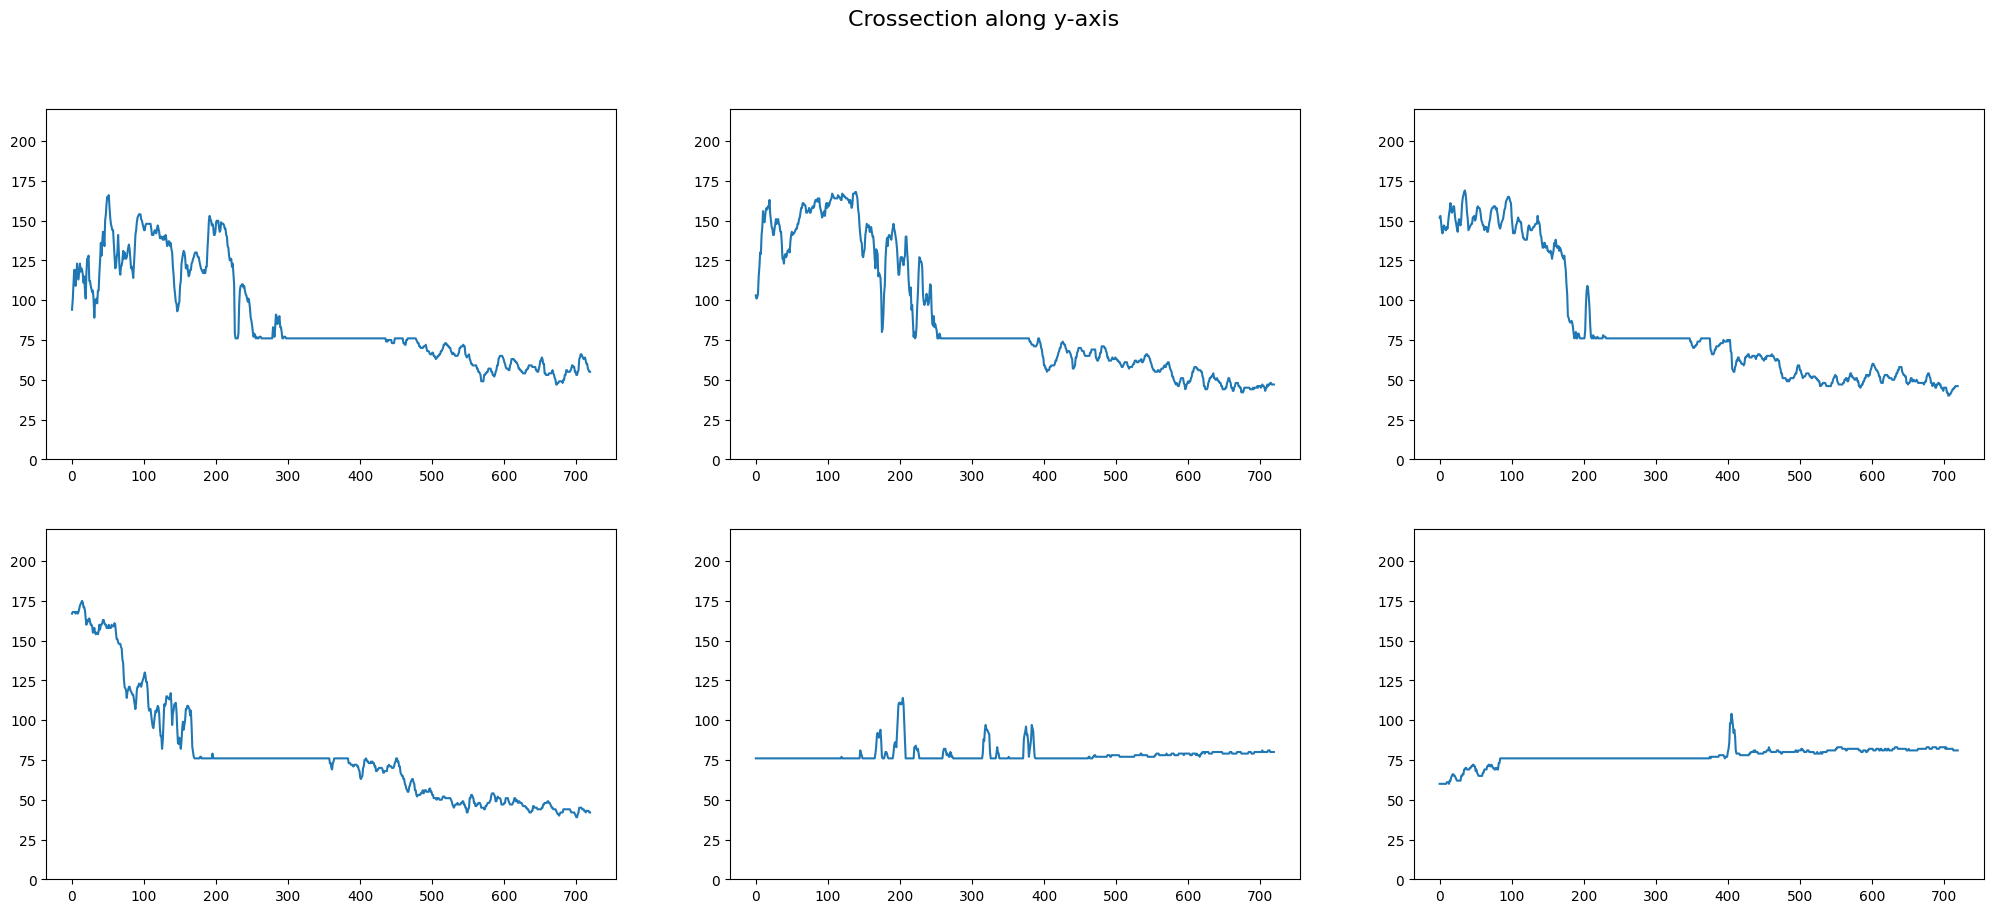

In [14]:
image = cv2.imread(frames_df.loc[100, 'Frame_Path'])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
slice_1 = gray[:, 100]
slice_2 = gray[:, 200]
slice_3 = gray[:, 300]
slice_4 = gray[:, 400]
slice_5 = gray[:, 700]
slice_6 = gray[:, 800]

fig, axes = plt.subplots(2, 3, figsize=[25, 10])
fig.suptitle('Crossection along y-axis', fontsize=16)
axes[0, 0].plot(slice_1)
axes[0, 0].set_ylim([0, 220])
axes[0, 1].plot(slice_2)
axes[0, 1].set_ylim([0, 220])
axes[0, 2].plot(slice_3)
axes[0, 2].set_ylim([0, 220])
axes[1, 0].plot(slice_4)
axes[1, 0].set_ylim([0, 220])
axes[1, 1].plot(slice_5)
axes[1, 1].set_ylim([0, 220])
axes[1, 2].plot(slice_6)
axes[1, 2].set_ylim([0, 220])
plt.show()

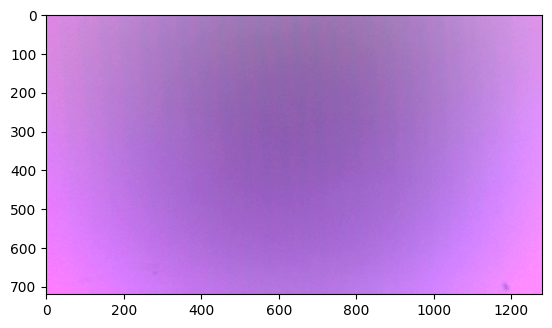

In [15]:
image = cv2.imread(frames_df.loc[13000, 'Frame_Path'])
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

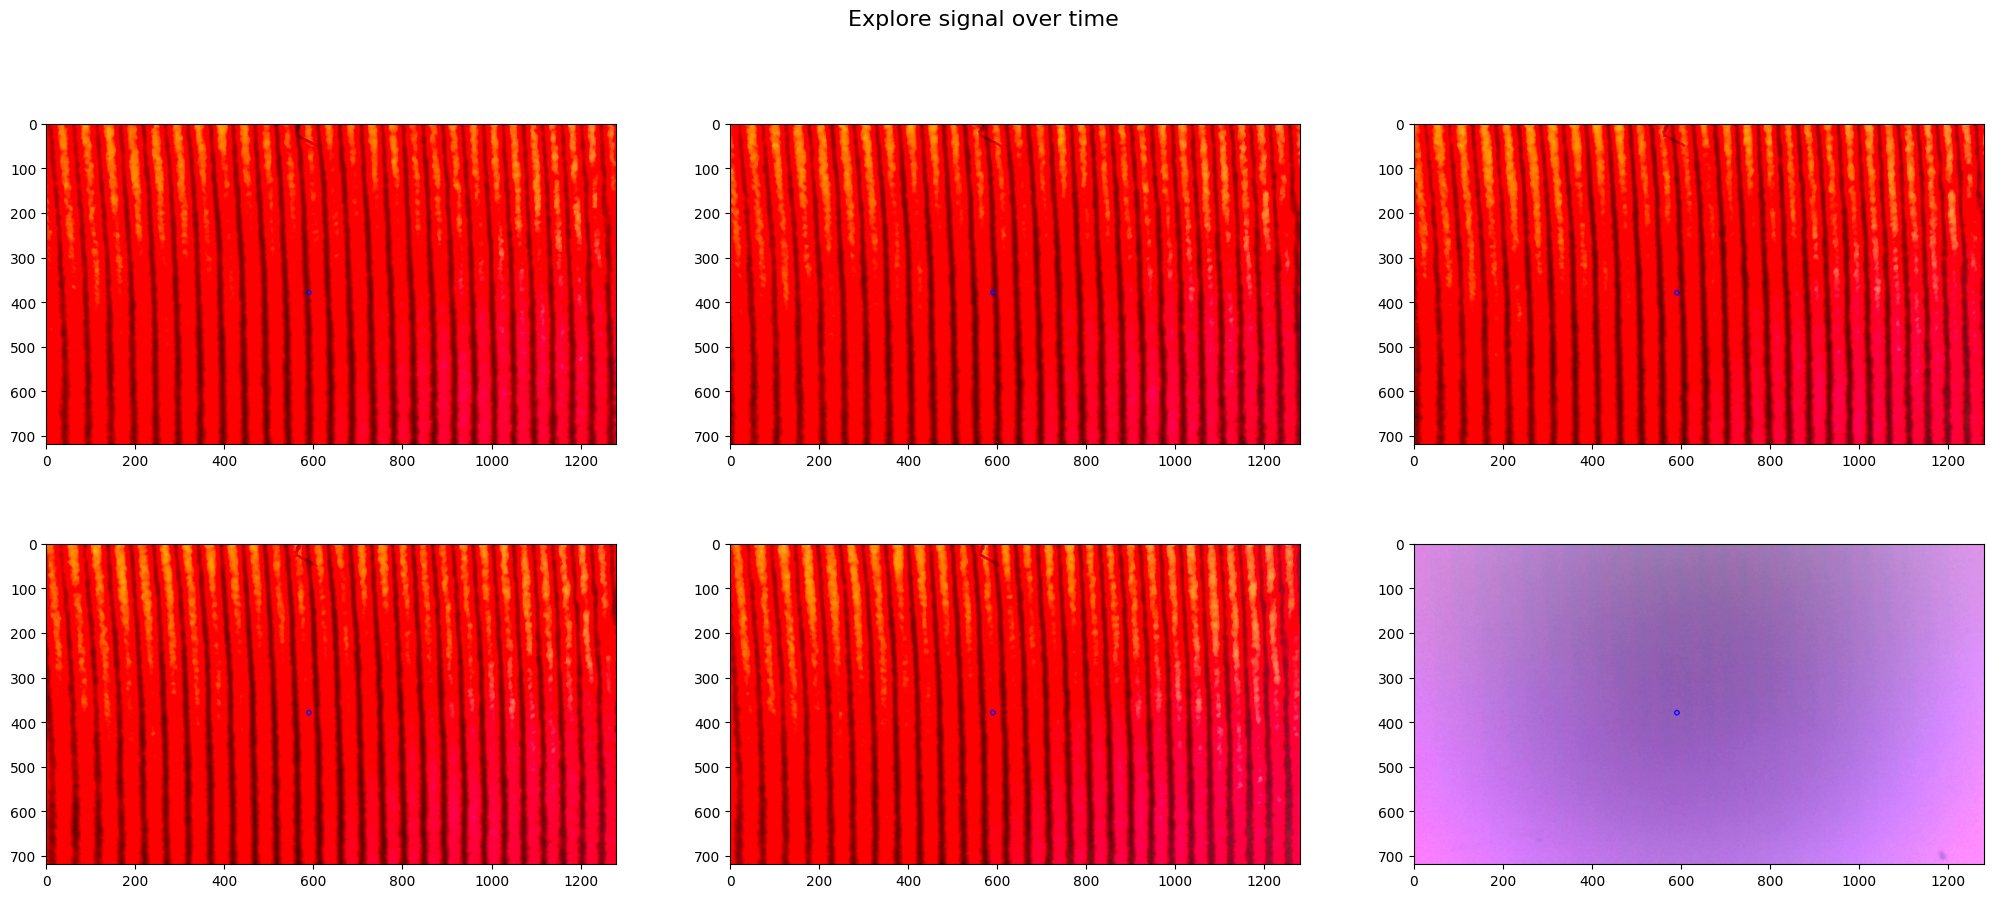

In [16]:
image1 = cv2.imread(frames_df.loc[0, 'Frame_Path'])
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image1 = cv2.circle(image1, (590, 380), 5, (0, 0, 255) , 2)
image2 = cv2.imread(frames_df.loc[2300, 'Frame_Path'])
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image2 = cv2.circle(image2, (590, 380), 5, (0, 0, 255) , 2)
image3 = cv2.imread(frames_df.loc[4000, 'Frame_Path'])
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image3 = cv2.circle(image3, (590, 380), 5, (0, 0, 255) , 2)
image4 = cv2.imread(frames_df.loc[8000, 'Frame_Path'])
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
image4 = cv2.circle(image4, (590, 380), 5, (0, 0, 255) , 2)
image5 = cv2.imread(frames_df.loc[11000, 'Frame_Path'])
image5 = cv2.cvtColor(image5, cv2.COLOR_BGR2RGB)
image5 = cv2.circle(image5, (590, 380), 5, (0, 0, 255) , 2)
image6 = cv2.imread(frames_df.loc[13000, 'Frame_Path'])
image6 = cv2.cvtColor(image6, cv2.COLOR_BGR2RGB)
image6 = cv2.circle(image6, (590, 380), 5, (0, 0, 255) , 2)
fig, axes = plt.subplots(2, 3, figsize=[25, 10])
fig.suptitle('Explore signal over time', fontsize=16)
axes[0, 0].imshow(image1)
axes[0, 1].imshow(image2)
axes[0, 2].imshow(image3)
axes[1, 0].imshow(image4)
axes[1, 1].imshow(image5)
axes[1, 2].imshow(image6)
plt.show()

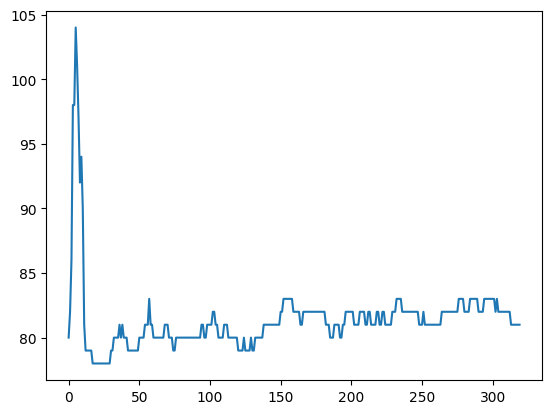

In [17]:
image = cv2.imread(frames_df.loc[100, 'Frame_Path'])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
slice_1 = gray[400:, 800]
plt.plot(slice_1)
plt.show()

In [18]:
import numpy as np
def get_signal(frame_path):
    image = cv2.imread(frame_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray[380, 590]
    
frames_df['Signal_Strength_At_Center'] = frames_df['Frame_Path'].apply(get_signal)
frames_df

,Frame_Path,Timestamp,Signal_Strength,Signal_Strength_At_Center
0,/home/petro/snu/resources/frames/frame_0.png,0 days 00:00:00,112,57
1,/home/petro/snu/resources/frames/frame_1.png,0 days 00:00:00.200000,117,55
2,/home/petro/snu/resources/frames/frame_2.png,0 days 00:00:00.400000,117,58
3,/home/petro/snu/resources/frames/frame_3.png,0 days 00:00:00.600000,116,55
4,/home/petro/snu/resources/frames/frame_4.png,0 days 00:00:00.800000,119,56
...,...,...,...,...
13023,/home/petro/snu/resources/frames/frame_13023.png,0 days 00:43:24.600000,138,120
13024,/home/petro/snu/resources/frames/frame_13024.png,0 days 00:43:24.800000,139,121
13025,/home/petro/snu/resources/frames/frame_13025.png,0 days 00:43:25,140,122
13026,/home/petro/snu/resources/frames/frame_13026.png,0 days 00:43:25.200000,139,121


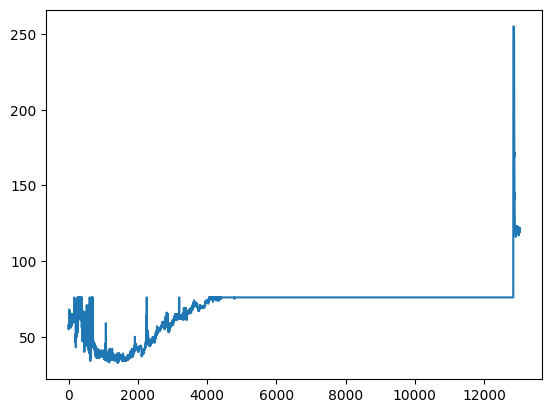

In [19]:
plt.plot(frames_df['Signal_Strength_At_Center'])
plt.show()

In [28]:
start = 19
end = 70

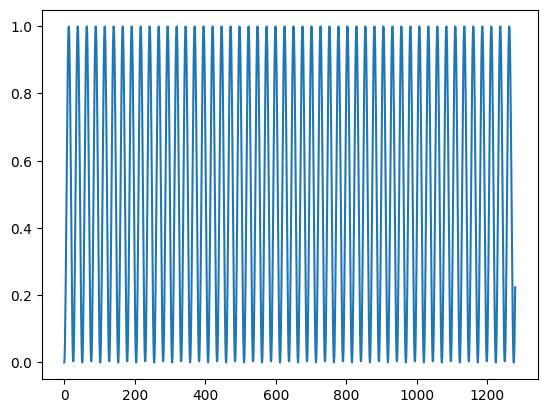

In [35]:
import math
dimensions = cv2.imread(frames_df.loc[13000, 'Frame_Path']).shape
w = 2 * math.pi / (end - start)
x = np.arange(dimensions[1])
y = np.sin(w * x) ** 2
plt.plot(y)
plt.show()

(720, 1280, 3)